Title: My First Blog 
Date: 2019-09-12
Slug: Blog#1

RANdom SAmple Consensus (RANSAC) Method:

First, a little bit of history: 

The RANSAC algorithm was first published by Fischler and Bolles at SRI (Stanford Research Institute) International in 1981. They used RANSAC to solve the Location Determination Problem (LDP), where the goal is to determine the points in the space that project onto an image into a set of landmarks with known locations.


Today's usage: 

Today, it is typically used for linear and non-linear regression problems and is especially popular in the field of photogrammetric computer vision. Photogrammetry being the science of making measurements from photographs (input to photogrammetry is photographs, and the output is typically a map, a drawing, a measurement, or a 3D model of some real-world object or scene).


Here is a quick description of this method: 

RANSAC is a non-deterministic iterative method that estimates the parameters of a machine learning algorithm from a dataset that contains outliers. For that, it divides the points in the dataset into two subsets: 1- outliers 2- inliers. 

The process that is used to determine inliers and outliers is the following:

1. RANSAC starts by selecting a subset of points as hypothetical inliers.
2. After fitting the model to the hypothetical inliers, RANSAC checks which elements in the original dataset are consistent with the model instantiated with the estimated parameters.
3. Model is refitted with the new inliers
4. The RANSAC algorithm iteratively repeats until the inlier subset is large enough or reaching to the end of the iteration.


RANSAC comes with 2 assumptions: 

1. Data consists of inliers and outliers:
"inliers" will be data whose distribution can be explained by some set of model parameters, which can also be subject to noise, and "outliers" which are data that do not fit the model.

2. Given a set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

To show how RANSAC regression works, let's generate some data, throw some outliers in our dataset, and build 2 models a classic Linear Regression Model and a RANSAC Regression Model. To conclude, we will plot both regressors and compare the regression metrics resulting from the 2 models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Let's create our set of inliers (n=500), with an x and a y that is 50, plus 2 times x with some random noise around that:
np.random.seed(42)
x = np.linspace(5, 50, 500)
y = 50 + 2 * x  + np.random.normal(0, 10, size=len(x))
df = pd.DataFrame({'A': x, 'B': y})
df.head(5)

,A,B
0,5.000000,64.967142
1,5.090180,58.797718
2,5.180361,66.837607
3,5.270541,75.771381
4,5.360721,58.379909


In [3]:
# Then, a set of outliers (n=100) with y2 0.5 times x2 with some random noise around too:
x2 = np.linspace(30, 50, 100)
y2 = 0.5* x2  + np.random.normal(0, 5, size=len(x2))
df2 = pd.DataFrame({'A': x2, 'B': y2})

In [4]:
# ... And merge our 2 datasets
df = df.append(df2, ignore_index=True)

In the merged dataframe, values in column [A] and column [B] will be respectively our "predictor" and our "target" variables.

Text(0, 0.5, 'Target')

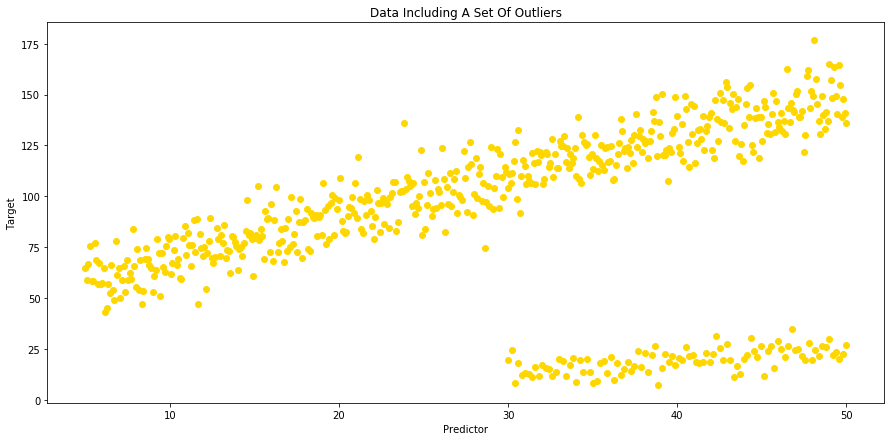

In [5]:
# We can now visualize our data using scatter plots:
fig = plt.figure(figsize=(15,7))
ax = plt.gca()
ax.scatter(x=df['A'], y=df['B'], c ='gold')
plt.title("Data Including A Set Of Outliers")
plt.xlabel("Predictor")
plt.ylabel("Target")

In [6]:
# ... And fit a model using all data and ordinary Linear Regression:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

Y = df['B']
X = df['A'].values.reshape(-1, 1)

linreg = LinearRegression() 
linreg.fit(X,Y)

# Let's print slope and intercept for our Linear Regression model:
print("Slope - Linear Regression:", linreg.coef_)
print("Intercept - Linear Regression:", linreg.intercept_)

Slope - Linear Regression: [0.82654094]
Intercept - Linear Regression: 66.34239236618237


In [7]:
# We can now calculate our predicted value 'y hat':
df['Linear_Yhat'] = linreg.intercept_ + linreg.coef_ * df['A']

Text(0, 0.5, 'Target')

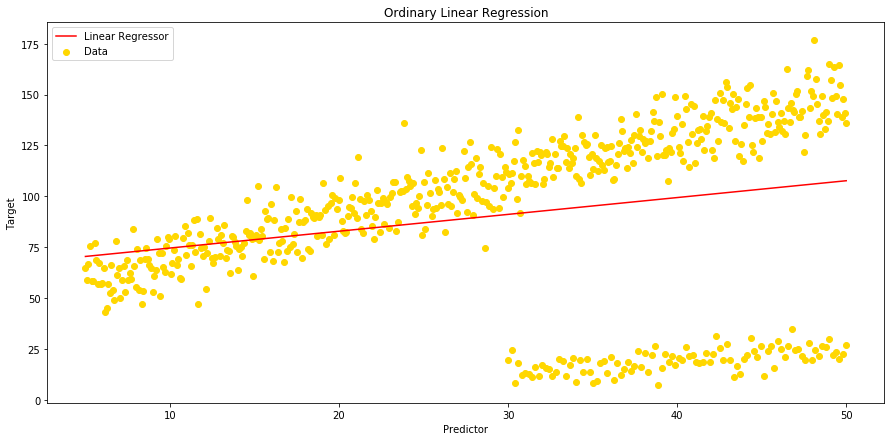

In [8]:
# And then plot our Linear Regressor:
fig = plt.figure(figsize=(15,7))
ax = plt.gca()

ax.scatter(x=df['A'], y=df['B'], c ='gold')
ax.plot(df['A'], df['Linear_Yhat'], color='r');
plt.title("Ordinary Linear Regression")
plt.gca().legend(('Linear Regressor', 'Data'), loc='upper left')
plt.xlabel("Predictor")
plt.ylabel("Target")

In [9]:
# Let's see how our regression metrics look now: 

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_squared_log_error 

# Mean Squared Error (Goal: Get  𝑀𝑆𝐸  as close to 0 as possible.:
print('Mean Squared Error - Linear Regression: ', (mean_squared_error(df['B'], df['Linear_Yhat'])))

# Mean Absolute Error (Goal: Get  𝑀𝐴𝐸  as close to 0 as possible)
print('Mean Absolute Error - Linear Regression: ', (mean_absolute_error(df['B'], df['Linear_Yhat'])))

# Median Absolute Error (Goal: Get  𝑀𝑒𝑑𝐴𝐸  as close to 0 as possible)
print('Median Absolute Error - Linear Regression: ', median_absolute_error(df['B'], df['Linear_Yhat']))

# Root Mean Square Error (Goal: Get  𝑅𝑀𝑆𝐸  as close to 0 as possible):
print('Root Mean Square Error - Linear Regression: ', (np.sqrt(mean_squared_error(df['B'], df['Linear_Yhat']))))

# Mean Squared Log Error (Goal: Get  𝑀𝑆L𝐸  as close to 0 as possible):
print('Mean Square Log Error - Linear Regression: ', mean_squared_log_error(df['B'], df['Linear_Yhat']))

# 𝑅2 (Goal: Get  𝑅2  as close to 1 as possible):
print('R Squared - Linear Regression: ', r2_score(df['B'], df['Linear_Yhat']))

Mean Squared Error - Linear Regression:  1563.1242990198043
Mean Absolute Error - Linear Regression:  29.946349872420967
Median Absolute Error - Linear Regression:  21.985884617753833
Root Mean Square Error - Linear Regression:  39.5363667908396
Mean Square Log Error - Linear Regression:  0.4990655738288573
R Squared - Linear Regression:  0.06861415661215686


In [10]:
# The next step will be to fit linear model with RANSAC algorithm:
from sklearn.linear_model import RANSACRegressor

ransac = linear_model.RANSACRegressor()
ransac.fit(X, Y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# We can now compare estimated Coefficients and Intercepts resulting from our 2 regression models:
print("Slope, Intercept:")
print("Linear Regression: ", linreg.coef_, ',', linreg.intercept_)
print("RANSAC Regression: " , ransac.estimator_.coef_ , ',', ransac.estimator_.intercept_)

Slope, Intercept:
Linear Regression:  [0.82654094] , 66.34239236618237
RANSAC Regression:  [2.01751038] , 49.361073815170585


In [20]:
# And calculate our 'y hat' for the RANSAC Regression in order to plot the RANSAC Regressor:
df['Yhat_ransac'] = ransac.estimator_.intercept_ + ransac.estimator_.coef_ * df['A']

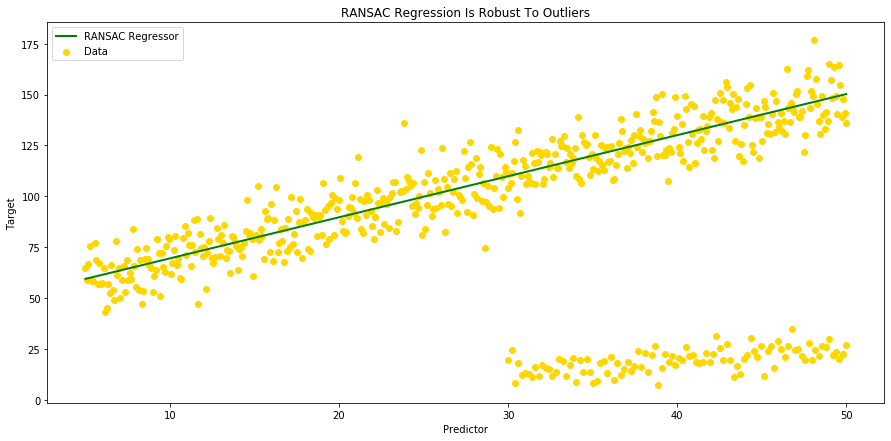

In [21]:
# Let's plot our RANSAC Regressor, and see if it is robust to outliers:
fig = plt.figure(figsize=(15,7))
ax = plt.gca()

ax.scatter(x=df['A'], y=df['B'], c ='gold')
ax.plot(df['A'], df['Yhat_ransac'], color='green', linewidth=2)
plt.title("RANSAC Regression Is Robust To Outliers")
plt.gca().legend(('RANSAC Regressor', 'Data'), loc='upper left')
plt.xlabel("Predictor")
plt.ylabel("Target");

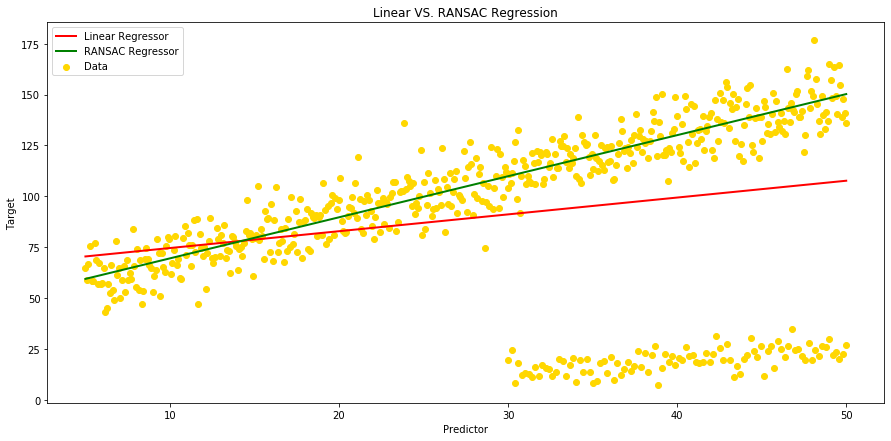

In [13]:
# We can now show our 2 regressors on the same plot in order to visulaize the difference between our 2 models:   
fig = plt.figure(figsize=(15,7))
ax = plt.gca()

ax.scatter(x=df['A'], y=df['B'], c ='gold')
ax.plot(df['A'], df['Linear_Yhat'], color='red', linewidth=2);
ax.plot(df['A'], df['Linear_Yhat_ransac'], color='green', linewidth=2)
plt.title("Linear VS. RANSAC Regression")
plt.gca().legend(('Linear Regressor' , 'RANSAC Regressor', 'Data'), loc='upper left')
plt.xlabel("Predictor")
plt.ylabel("Target");

As we can see on the above plot, when ordinary Linear Regression is influenced by outliers, RANSAC isn't.
RANSAC algorythm takes the complete input, separates inliers from outliers and build a model that is estimated only from the determined inliers (see ordinary Linear Regressor in red vs. green RANSAC Regressor in green)  

In [14]:
X, Y = np.array(X).reshape(-1, 1), np.array(Y).reshape(-1, 1)
inlier_mask = ransac.inlier_mask_
X_accpt, Y_accpt = X[inlier_mask], Y[inlier_mask]
Y_predict = ransac.estimator_.coef_ * X_accpt + ransac.estimator_.intercept_

In [15]:
# Finally let's compare our regression metrics, and see which model performs better: 

print('Regression Metrics :')
print('')
# Mean Squared Error (Goal: Get  𝑀𝑆𝐸  as close to 0 as possible):
print('Mean Squared Error - Linear Regression: ', (mean_squared_error(df['B'], df['Linear_Yhat'])))
print('Mean Squared Error - RANSAC Regression: ', (mean_squared_error(Y_accpt, Y_predict)))
print('')
# Mean Absolute Error (Goal: Get  𝑀𝐴𝐸  as close to 0 as possible):
print('Mean Absolute Error - Linear Regression: ', (mean_absolute_error(df['B'], df['Linear_Yhat'])))
print('Mean Absolute Error - RANSAC Regression: ', (mean_absolute_error(Y_accpt, Y_predict)))
print('')
# Median Absolute Error (Goal: Get  𝑀𝑒𝑑𝐴𝐸  as close to 0 as possible):
print('Median Absolute Error - Linear Regression: ', median_absolute_error(df['B'], df['Linear_Yhat']))
print('Median Absolute Error - RANSAC Regression: ', median_absolute_error(Y_accpt, Y_predict))
print('')
# Root Mean Square Error (Goal: Get  𝑅𝑀𝑆𝐸  as close to 0 as possible):
print('Root Mean Square Error - Linear Regression: ', (np.sqrt(mean_squared_error(df['B'], df['Linear_Yhat']))))
print('Root Mean Square Error - RANSAC Regression: ', (np.sqrt(mean_squared_error(Y_accpt, Y_predict))))
print('')
# Mean Squared Log Error (Goal: Get  𝑀𝑆L𝐸  as close to 0 as possible):
print('Mean Square Log Error - Linear Regression: ', mean_squared_log_error(df['B'], df['Linear_Yhat']))
print('Mean Square Log Error - RANSAC Regression: ', mean_squared_log_error(Y_accpt, Y_predict))
print('')
# 𝑅2 (Goal: Get  𝑅2  as close to 1 as possible):
print('R Squared - Linear Regression: ', r2_score(df['B'], df['Linear_Yhat']))
print('R Squared - RANSAC Regression: ', r2_score(Y_accpt, Y_predict))


Regression Metrics :

Mean Squared Error - Linear Regression:  1563.1242990198043
Mean Squared Error - RANSAC Regression:  86.32715034438624

Mean Absolute Error - Linear Regression:  29.946349872420967
Mean Absolute Error - RANSAC Regression:  7.53403298028855

Median Absolute Error - Linear Regression:  21.985884617753833
Median Absolute Error - RANSAC Regression:  6.564924468214095

Root Mean Square Error - Linear Regression:  39.5363667908396
Root Mean Square Error - RANSAC Regression:  9.291240516980832

Mean Square Log Error - Linear Regression:  0.4990655738288573
Mean Square Log Error - RANSAC Regression:  0.009578999086090615

R Squared - Linear Regression:  0.06861415661215686
R Squared - RANSAC Regression:  0.8891918079356032


When comparing the different regression metrics, we can see that RANSAC algorythm can boost our model scores when the dataset includes a significant amount of outliers. In this specifc case, all the regression metrics scores have improved significantly.  The difference is particularly obervable on R2 score which reaches almost 89% with RANSAC regression model, when its score was below 7% with the ordinary Linear Regression model.  

Conclusion:

Pros:

Linear regression models can be heavily impacted by the presence of outliers, which can come for instance from extreme values of the noise, or erroneous measurements. RANdom SAmple Consensus (RANSAC) algorithm can be used to remove sets of points from your model that do not follow the dominant pattern of the data, and as a robust machine learning algorithm, RANSAC will improve the performance of your model by estimating the parameters with a high degree of accuracy, even when a significant number of outliers are present in the data set.


Cons:

RANSAC usually performs poorly when the number of inliers in the dataset is less than 50%. Also, when the noise threshold is too small, the estimated parameters tend to be unstable. Finally, this algorithm removes data from the model, and in general losing data when developing models is something we want to avoid. 